In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPool2D,Flatten,Activation
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.keras.utils as utils

In [3]:
# 1. 데이터 셋 생성
width = 28
height = 28
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()
# 1차원, scale조정
X_train = X_train.reshape(60000,width*height).astype('float32')/255.0
X_test = X_test.reshape(10000,width*height).astype('float32')/255.0
# 데이터셋 확보
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]
# 원핫인코딩
Y_train = utils.to_categorical(Y_train)
Y_val = utils.to_categorical(Y_val)
Y_test = utils.to_categorical(Y_test)

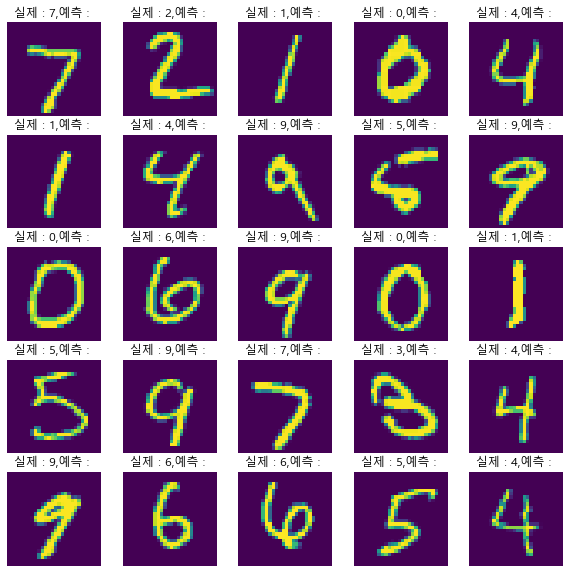

In [9]:
# 데이터 이미지 뿌리기
plt_row=5
plt_col=5
plt.rcParams['figure.figsize']=(10,10)
plt.rc('font',family='Malgun Gothic')
f, axarr = plt.subplots(plt_row,plt_col)
for i in range(plt_row*plt_col):
    sub_plt= axarr[i//5,i%5]
    sub_plt.imshow(X_test[i].reshape(width,height))
    sub_plt.axis('off') # 축 제거
    sub_plt.set_title('실제 : '+str(np.argmax(Y_test[i]))+',예측 : ')

# 1. DNN(다중 퍼셉트론)

Epoch 1/30
1563/1563 [==============================] - 4s 2ms/step - loss: 0.3907 - accuracy: 0.8775 - val_loss: 0.1144 - val_accuracy: 0.9664
Epoch 2/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1020 - accuracy: 0.9677 - val_loss: 0.1018 - val_accuracy: 0.9700
Epoch 3/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0695 - accuracy: 0.9776 - val_loss: 0.0892 - val_accuracy: 0.9746
Epoch 4/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0465 - accuracy: 0.9849 - val_loss: 0.0836 - val_accuracy: 0.9782
Epoch 5/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0362 - accuracy: 0.9886 - val_loss: 0.1038 - val_accuracy: 0.9744
Epoch 6/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0358 - accuracy: 0.9878 - val_loss: 0.1028 - val_accuracy: 0.9749
Epoch 7/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0295 - accuracy: 0.9912 - val_loss: 0.1189 - val_accuracy:

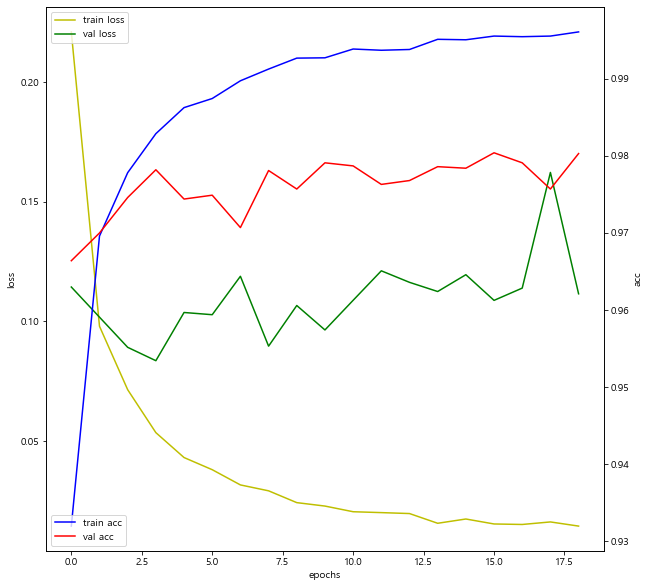

313/313 [==============================] - 0s 988us/step - loss: 0.1123 - accuracy: 0.9805
loss:  0.11226075142621994
accuracy :  0.9804999828338623


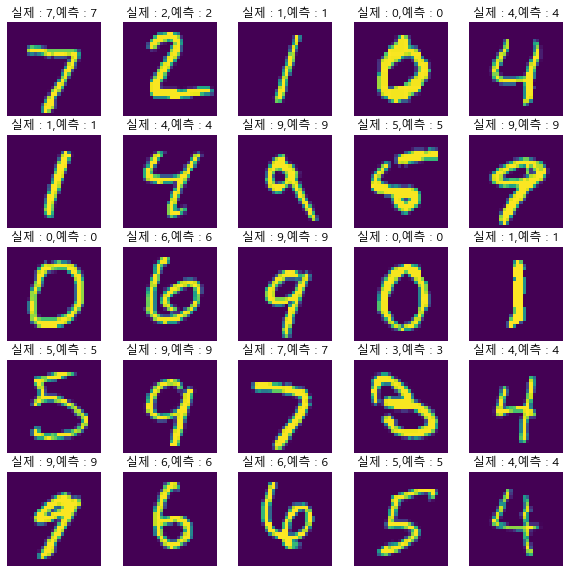

In [11]:
# 2. 모델 구성
model = Sequential()
model.add(Dense(256,input_dim=width*height,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))
# 3. 학습과정설정
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# 4. 학습
early_stop=EarlyStopping(patience=15)
hist = model.fit(X_train,Y_train,epochs=30,batch_size=32,callbacks=[early_stop],validation_data=(X_val,Y_val))
# 5. 모델학습과정을 표시하고 평가하기
fig, loss_ax = plt.subplots()
loss_ax.plot(hist.history['loss'],'y',label='train loss')
loss_ax.plot(hist.history['val_loss'],'g',label='val loss')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx() 
acc_ax.plot(hist.history['accuracy'],'b',label='train acc')
acc_ax.plot(hist.history['val_accuracy'],'r',label='val acc')
acc_ax.set_ylabel('acc')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()
# 6. 모델 평가하기
loss_and_metrics = model.evaluate(X_test,Y_test,batch_size=32)
print('loss: ',loss_and_metrics[0])
print('accuracy : ',loss_and_metrics[1])
# 7. 모델 사용하기(예측)
yhat = model.predict(X_test,batch_size=32)
# 예측 결과 이미지로 출력
plt_row=5
plt_col=5
plt.rcParams['figure.figsize']=(10,10)
plt.rc('font',family='Malgun Gothic')
f, axarr = plt.subplots(plt_row,plt_col)
for i in range(plt_row*plt_col):
    sub_plt= axarr[i//5,i%5]
    sub_plt.imshow(X_test[i].reshape(width,height))
    sub_plt.axis('off') # 축 제거
    title = '실제 : '+str(np.argmax(Y_test[i]))+',예측 : '+str(np.argmax(yhat[i]))
    sub_plt.set_title(title)

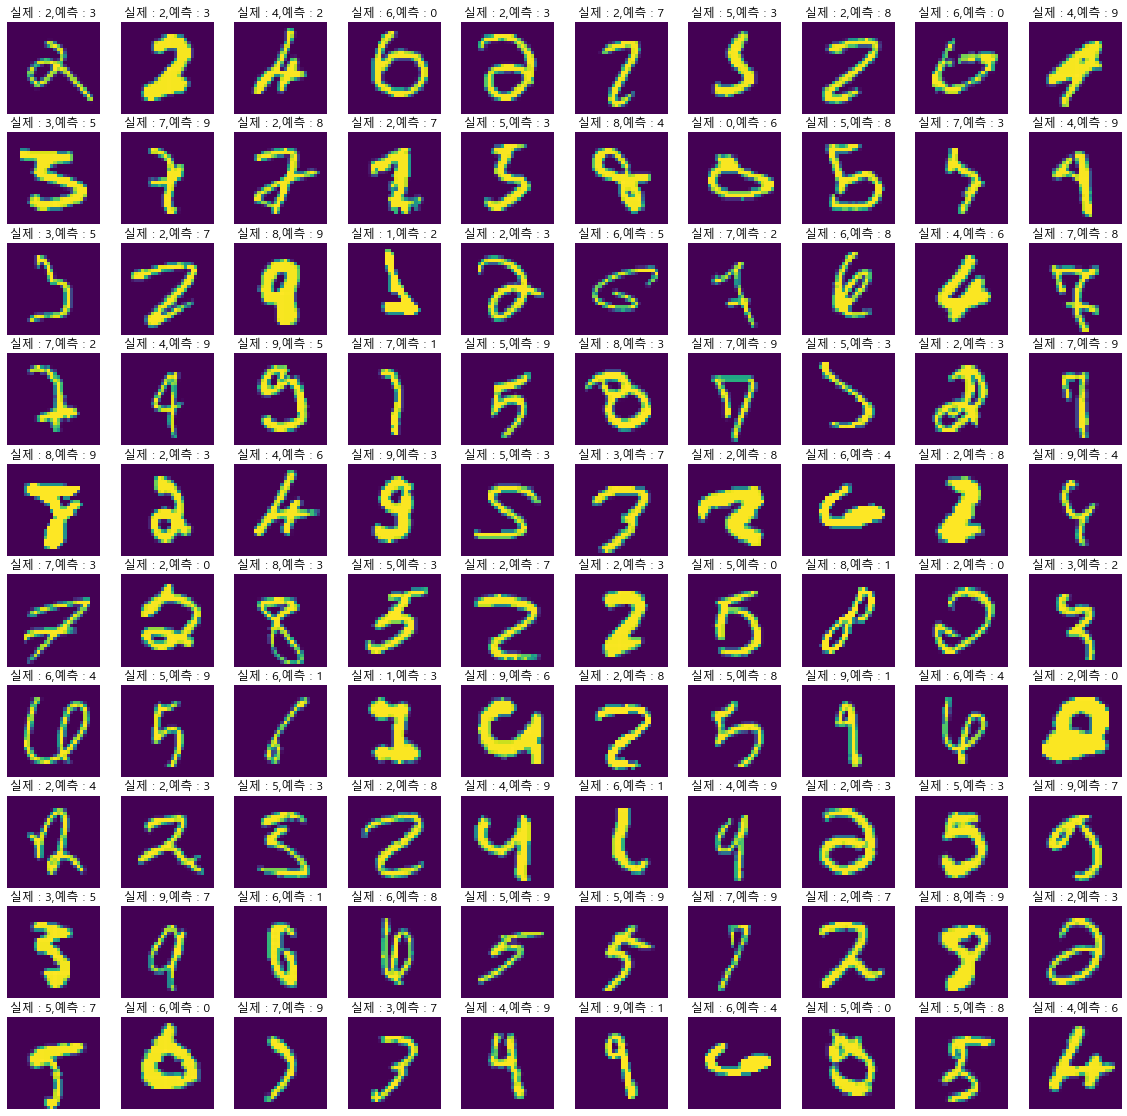

In [13]:
# 7. 모델 사용하기(예측) 
yhat = model.predict(X_test,batch_size=32)
# 예측 결과 틀린 것 만 이미지로 출력
plt_row=10
plt_col=10
plt.rcParams['figure.figsize']=(20,20)
plt.rc('font',family='Malgun Gothic')
f, axarr = plt.subplots(plt_row,plt_col)

i=0
cnt=0
while cnt<(plt_row*plt_col):
    if np.argmax(Y_test[i]) == np.argmax(yhat[i]):
        i+=1
        continue
    sub_plt= axarr[cnt//plt_row,cnt%plt_col]
    sub_plt.imshow(X_test[i].reshape(width,height))
    sub_plt.axis('off') # 축 제거
    title = '실제 : '+str(np.argmax(Y_test[i]))+',예측 : '+str(np.argmax(yhat[i]))
    sub_plt.set_title(title)
    i+=1
    cnt+=1

# 2. CNN(컨볼루션 레이어)

Epoch 1/30
1563/1563 [==============================] - 19s 12ms/step - loss: 0.3499 - accuracy: 0.8866 - val_loss: 0.0565 - val_accuracy: 0.9854
Epoch 2/30
1563/1563 [==============================] - 18s 11ms/step - loss: 0.0536 - accuracy: 0.9839 - val_loss: 0.0464 - val_accuracy: 0.9862
Epoch 3/30
1563/1563 [==============================] - 18s 12ms/step - loss: 0.0388 - accuracy: 0.9876 - val_loss: 0.0449 - val_accuracy: 0.9873
Epoch 4/30
1563/1563 [==============================] - 18s 12ms/step - loss: 0.0245 - accuracy: 0.9925 - val_loss: 0.0561 - val_accuracy: 0.9860
Epoch 5/30
1563/1563 [==============================] - 18s 11ms/step - loss: 0.0187 - accuracy: 0.9944 - val_loss: 0.0493 - val_accuracy: 0.9870
Epoch 6/30
1563/1563 [==============================] - 18s 11ms/step - loss: 0.0160 - accuracy: 0.9945 - val_loss: 0.0365 - val_accuracy: 0.9913
Epoch 7/30
1563/1563 [==============================] - 18s 12ms/step - loss: 0.0125 - accuracy: 0.9955 - val_loss: 0.0405 -

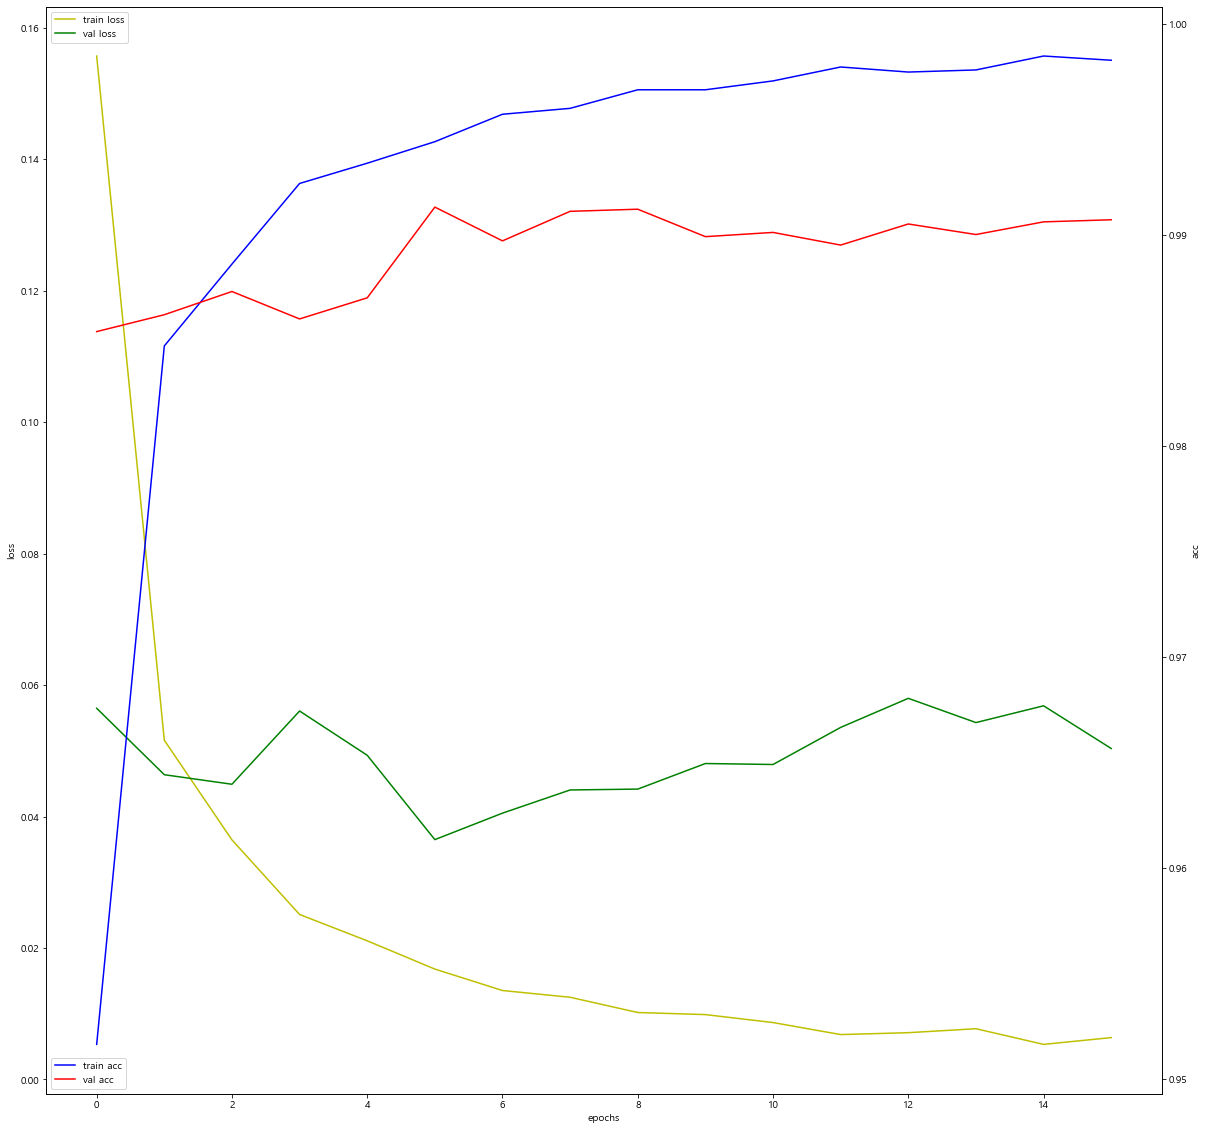

313/313 [==============================] - 1s 3ms/step - loss: 0.0422 - accuracy: 0.9922
loss:  0.042216911911964417
accuracy :  0.9922000169754028


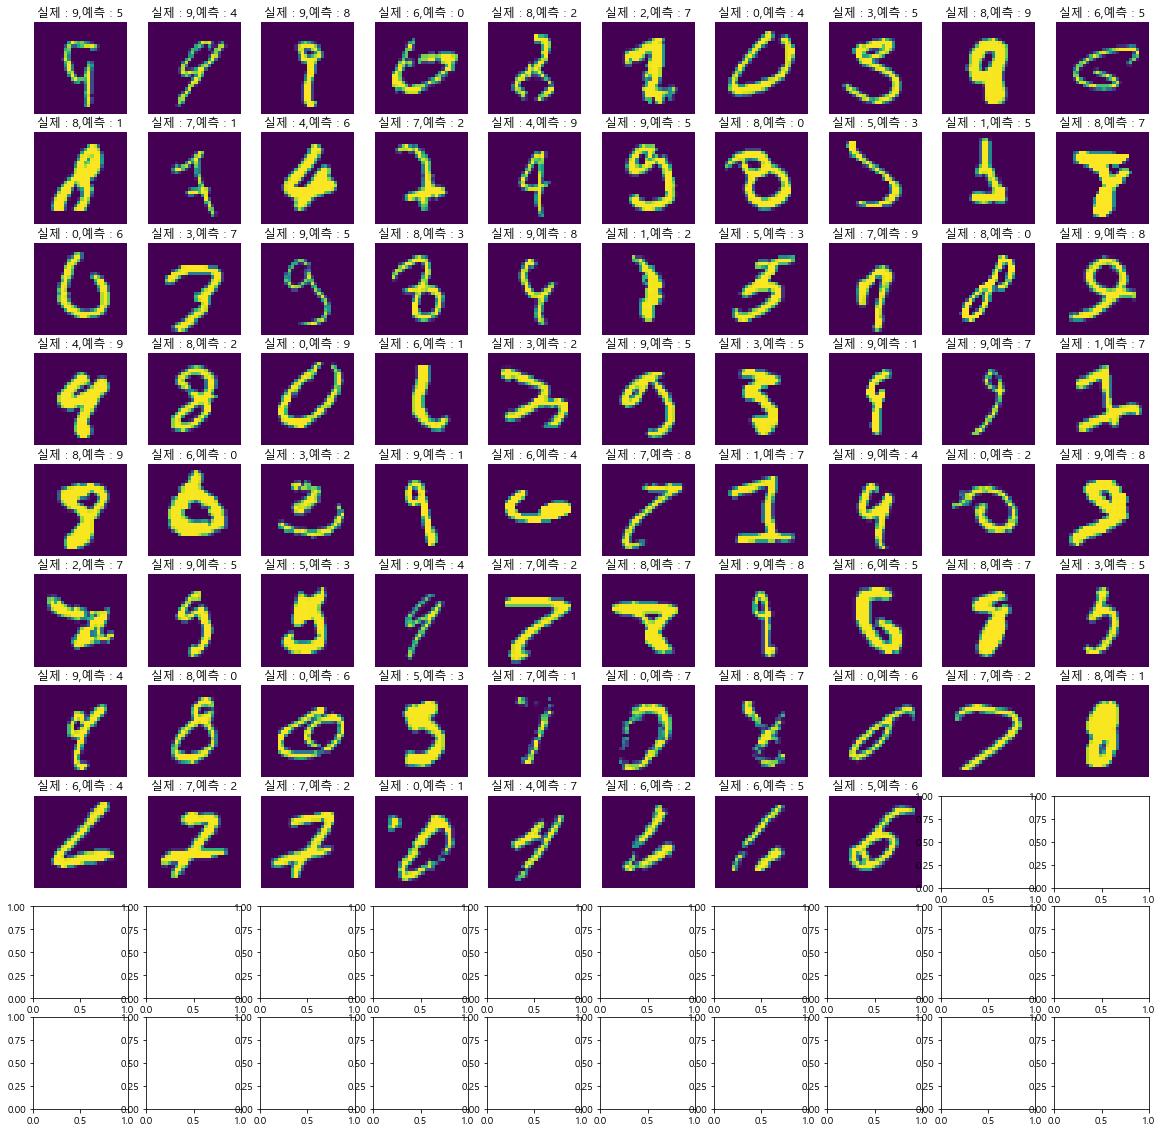

In [15]:
# 1. 데이터 셋 생성
width = 28
height = 28
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()
# 3차원화,정규화
X_train = X_train.reshape(60000,width, height, 1).astype('float32')/255.0
X_test = X_test.reshape(10000,width, height, 1).astype('float32')/255.0
# 데이터셋 확보
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]
# 원핫인코딩
Y_train = utils.to_categorical(Y_train)
Y_val = utils.to_categorical(Y_val)
Y_test = utils.to_categorical(Y_test)
# 2. 모델 구성
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(width,height,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256,input_dim=width*height,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))
# 3. 학습과정설정
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# 4. 학습
early_stop=EarlyStopping(patience=10)
hist = model.fit(X_train,Y_train,epochs=30,batch_size=32,callbacks=[early_stop],validation_data=(X_val,Y_val))
# 5. 모델학습과정을 표시하고 평가하기
fig, loss_ax = plt.subplots()
loss_ax.plot(hist.history['loss'],'y',label='train loss')
loss_ax.plot(hist.history['val_loss'],'g',label='val loss')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx() 
acc_ax.plot(hist.history['accuracy'],'b',label='train acc')
acc_ax.plot(hist.history['val_accuracy'],'r',label='val acc')
acc_ax.set_ylabel('acc')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()
# 6. 모델 평가하기
loss_and_metrics = model.evaluate(X_test,Y_test,batch_size=32)
print('loss: ',loss_and_metrics[0])
print('accuracy : ',loss_and_metrics[1])
# 7. 모델 사용하기(예측) 
yhat = model.predict(X_test,batch_size=32)
# 예측 결과 틀린 것 만 이미지로 출력
plt_row=10
plt_col=10
plt.rcParams['figure.figsize']=(20,20)
plt.rc('font',family='Malgun Gothic')
f, axarr = plt.subplots(plt_row,plt_col)

i=0
cnt=0
while (cnt<(plt_row*plt_col)) and (i<len(yhat)):
    if np.argmax(Y_test[i]) == np.argmax(yhat[i]):
        i+=1
        continue
    sub_plt= axarr[cnt//plt_row,cnt%plt_col]
    sub_plt.imshow(X_test[i].reshape(width,height))
    sub_plt.axis('off') # 축 제거
    title = '실제 : '+str(np.argmax(Y_test[i]))+',예측 : '+str(np.argmax(yhat[i]))
    sub_plt.set_title(title)
    i+=1
    cnt+=1

Epoch 1/30
1563/1563 [==============================] - 62s 39ms/step - loss: 0.4001 - accuracy: 0.8687 - val_loss: 0.0483 - val_accuracy: 0.9857
Epoch 2/30
1563/1563 [==============================] - 61s 39ms/step - loss: 0.0576 - accuracy: 0.9833 - val_loss: 0.0539 - val_accuracy: 0.9854
Epoch 3/30
1563/1563 [==============================] - 60s 39ms/step - loss: 0.0452 - accuracy: 0.9859 - val_loss: 0.0309 - val_accuracy: 0.9913
Epoch 4/30
1563/1563 [==============================] - 59s 38ms/step - loss: 0.0381 - accuracy: 0.9884 - val_loss: 0.0324 - val_accuracy: 0.9925
Epoch 5/30
1563/1563 [==============================] - 62s 40ms/step - loss: 0.0306 - accuracy: 0.9911 - val_loss: 0.0382 - val_accuracy: 0.9904
Epoch 6/30
1563/1563 [==============================] - 62s 40ms/step - loss: 0.0269 - accuracy: 0.9918 - val_loss: 0.0356 - val_accuracy: 0.9896
Epoch 7/30
1563/1563 [==============================] - 61s 39ms/step - loss: 0.0239 - accuracy: 0.9926 - val_loss: 0.0280 -

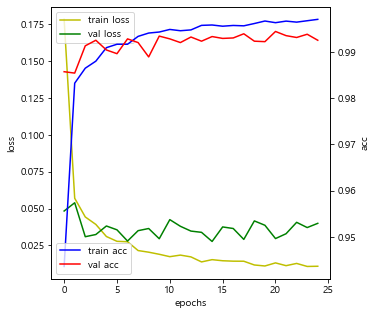

313/313 [==============================] - 2s 6ms/step - loss: 0.0280 - accuracy: 0.9944
loss:  0.02797422558069229
accuracy :  0.9944000244140625


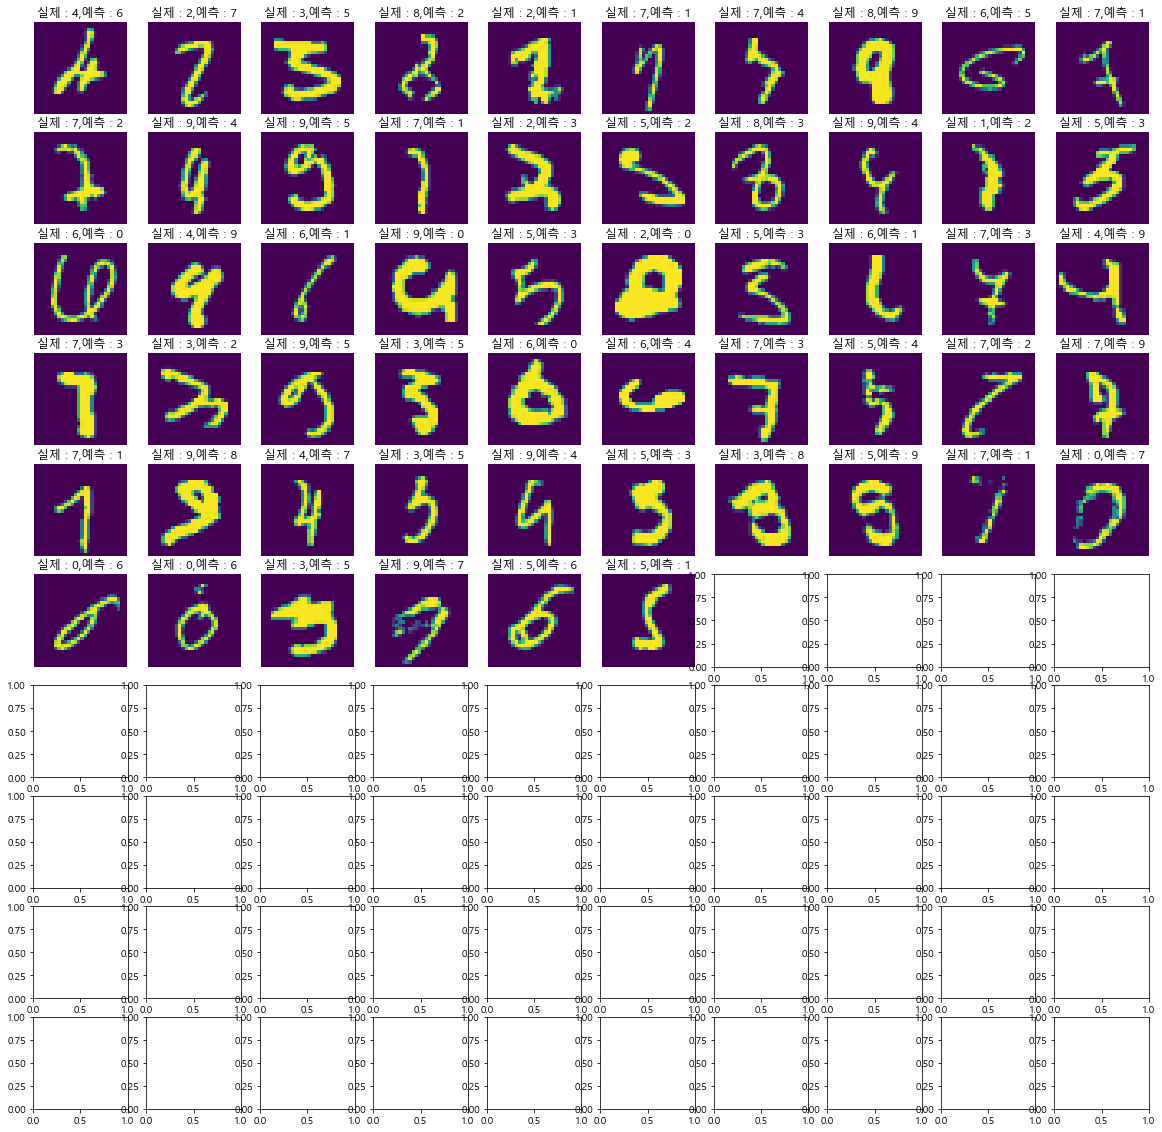

In [17]:
# 1. 데이터 셋 생성
width = 28
height = 28
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()
# 3차원화,정규화
X_train = X_train.reshape(60000,width, height, 1).astype('float32')/255.0
X_test = X_test.reshape(10000,width, height, 1).astype('float32')/255.0
# 데이터셋 확보
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]
# 원핫인코딩
Y_train = utils.to_categorical(Y_train)
Y_val = utils.to_categorical(Y_val)
Y_test = utils.to_categorical(Y_test)
# 2. 모델 구성
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(width,height,1)))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256,input_dim=width*height,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(126,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10,activation='softmax'))
# 3. 학습과정설정
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# 4. 학습
early_stop=EarlyStopping(patience=10)
hist = model.fit(X_train,Y_train,epochs=30,batch_size=32,callbacks=[early_stop],validation_data=(X_val,Y_val))
# 5. 모델학습과정을 표시하고 평가하기
fig, loss_ax = plt.subplots(figsize=(5,5))
loss_ax.plot(hist.history['loss'],'y',label='train loss')
loss_ax.plot(hist.history['val_loss'],'g',label='val loss')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx() 
acc_ax.plot(hist.history['accuracy'],'b',label='train acc')
acc_ax.plot(hist.history['val_accuracy'],'r',label='val acc')
acc_ax.set_ylabel('acc')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()
# 6. 모델 평가하기
loss_and_metrics = model.evaluate(X_test,Y_test,batch_size=32)
print('loss: ',loss_and_metrics[0])
print('accuracy : ',loss_and_metrics[1])
# 7. 모델 사용하기(예측) 
yhat = model.predict(X_test,batch_size=32)
# 예측 결과 틀린 것 만 이미지로 출력
plt_row=10
plt_col=10
plt.rcParams['figure.figsize']=(20,20)
plt.rc('font',family='Malgun Gothic')
f, axarr = plt.subplots(plt_row,plt_col)

i=0
cnt=0
while (cnt<(plt_row*plt_col)) and (i<len(yhat)):
    if np.argmax(Y_test[i]) == np.argmax(yhat[i]):
        i+=1
        continue
    sub_plt= axarr[cnt//plt_row,cnt%plt_col]
    sub_plt.imshow(X_test[i].reshape(width,height))
    sub_plt.axis('off') # 축 제거
    title = '실제 : '+str(np.argmax(Y_test[i]))+',예측 : '+str(np.argmax(yhat[i]))
    sub_plt.set_title(title)
    i+=1
    cnt+=1